In [51]:
# Calculate slope of n successive points on a time series

# Import necesary libraries
import yfinance as yf
import numpy as np
import datetime as dt
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

In [23]:
# Download historical data for required stocks
ticker = "AMZN"  # AMAZON
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(365),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [24]:
ohlcv

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-04,2256.379883,2326.979980,2256.379883,2315.989990,2315.989990,4865900
2020-05-05,2340.000000,2351.000000,2307.129883,2317.800049,2317.800049,3242500
2020-05-06,2329.439941,2357.449951,2320.000000,2351.260010,2351.260010,3117800
2020-05-07,2374.780029,2376.000000,2343.110107,2367.610107,2367.610107,3396400
2020-05-08,2372.139893,2387.239990,2357.000000,2379.610107,2379.610107,3206600
...,...,...,...,...,...,...
2021-04-26,3348.000000,3428.449951,3330.939941,3409.000000,3409.000000,4880700
2021-04-27,3443.469971,3460.000000,3398.010010,3417.429932,3417.429932,3827100
2021-04-28,3434.800049,3489.879883,3425.000000,3458.500000,3458.500000,4631900


In [60]:
def slope(ser,n):
    "function to calculate the slope of regression line for n consecutive points on a plot"
    ser = (ser - ser.min())/(ser.max() - ser.min())
    x = np.array(range(len(ser)))
    x = (x - x.min())/(x.max() - x.min())
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1):
        y_scaled = ser[i-n:i]
        x_scaled = x[:n]
        x_scaled = sm.add_constant(x_scaled)
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        if i==n: print(results.summary())
        
        # param[0] corresponds to constant value 
        # and param[-1] corresponds to the gradient (m) of y = mx + c
        # The gradient of a straight line is equal to the tangent of the angle 
        # formed between the line and the positive direction of the x-axis.
        
        slopes.append(results.params[-1])  
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

In [61]:
df = ohlcv.copy()
df["slope"] = slope(df["Adj Close"],20)
df

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     29.60
Date:                Mon, 03 May 2021   Prob (F-statistic):           3.61e-05
Time:                        00:54:01   Log-Likelihood:                 46.376
No. Observations:                  20   AIC:                            -88.75
Df Residuals:                      18   BIC:                            -86.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0216      0.011      2.001      0.0

,Open,High,Low,Close,Adj Close,Volume,slope
Date,,,,,,,
2020-05-04,2256.379883,2326.979980,2256.379883,2315.989990,2315.989990,4865900,0.000000
2020-05-05,2340.000000,2351.000000,2307.129883,2317.800049,2317.800049,3242500,0.000000
2020-05-06,2329.439941,2357.449951,2320.000000,2351.260010,2351.260010,3117800,0.000000
2020-05-07,2374.780029,2376.000000,2343.110107,2367.610107,2367.610107,3396400,0.000000
2020-05-08,2372.139893,2387.239990,2357.000000,2379.610107,2379.610107,3206600,0.000000
...,...,...,...,...,...,...,...
2021-04-26,3348.000000,3428.449951,3330.939941,3409.000000,3409.000000,4880700,72.643142
2021-04-27,3443.469971,3460.000000,3398.010010,3417.429932,3417.429932,3827100,70.827909
2021-04-28,3434.800049,3489.879883,3425.000000,3458.500000,3458.500000,4631900,68.209670


Text(0, 0.5, 'Angle')

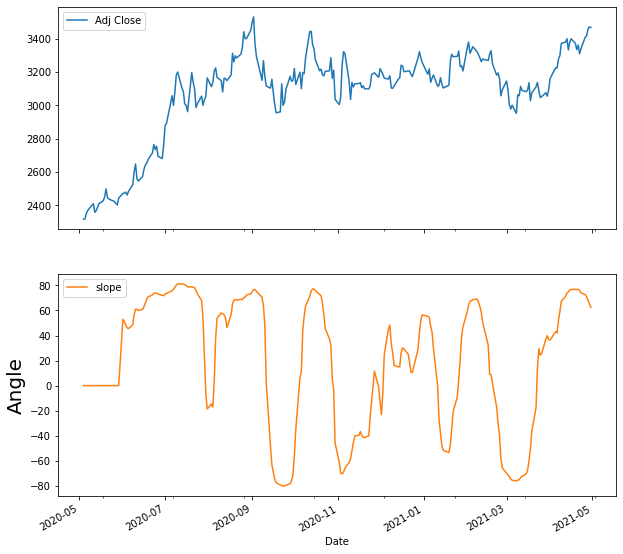

In [62]:
axes = df.iloc[:,[4,6]].plot(figsize=(10, 10), subplots=True, sharex=True)
axes[1].set_ylabel('Angle', size=20)

Text(0, 0.5, 'Angle')

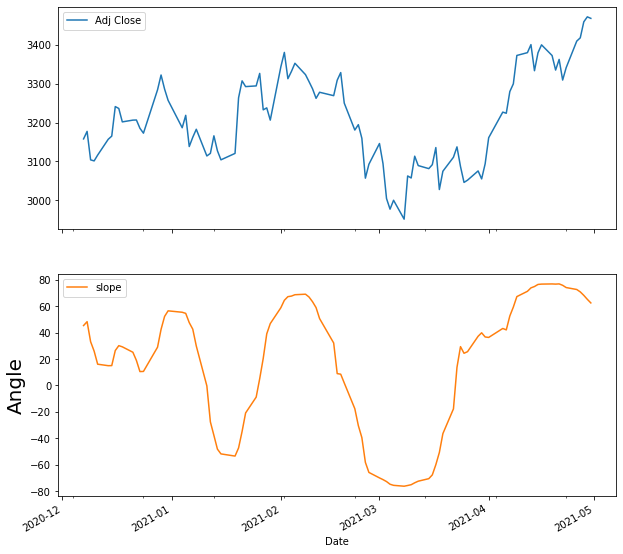

In [63]:
axes = df.iloc[-100:,[4,6]].plot(figsize=(10, 10), subplots=True, sharex=True)
axes[1].set_ylabel('Angle',size=20)